In [10]:
import os
os.chdir('C:/Users/raffa/PycharmProjects/PortfolioProject')
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from src.data_exploration.data_exploration import *

In [11]:
train_data = np.load( './data/train_test/train_data.npy')
test_data = np.load( './data/train_test/test_data.npy')
train_target = np.load( './data/train_test/train_target.npy')
test_target = np.load( './data/train_test/test_target.npy')

In [12]:
#train_data = np.delete(train_data,6,1)

In [13]:
train_data.shape

(11899, 35)

In [14]:
lin_model = LinearRegression()
lin_scores = cross_val_score(lin_model, train_data, train_target, scoring='neg_mean_absolute_percentage_error')

In [15]:
lin_scores = -lin_scores
print('Mean MAPE: %.3f (%.3f)' % (lin_scores.mean(), lin_scores.std()) )

Mean MAPE: 0.278 (0.006)


In [197]:
model = XGBRegressor(n_estimators=1000, max_depth=20, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=42,
                    eval_metric=["mape","rmse"],reg_alpha=0.15)

In [198]:
scores = cross_val_score(model, train_data, train_target, scoring='neg_mean_absolute_percentage_error')

In [199]:
scores = -scores
print('Mean MAPE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAPE: 0.162 (0.004)


In [16]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_target, test_size=0.2, random_state=42)
eval_set = [(X_train, y_train), (X_val, y_val)]

In [17]:
model = XGBRegressor(n_estimators=1000, max_depth=20, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=42,
                    eval_metric=["mape","rmse"],early_stopping_rounds=10,reg_alpha=0.15)

In [18]:
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=10,
             enable_categorical=False, eta=0.01, eval_metric=['mape', 'rmse'],
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [20]:
val_pred = model.predict(X_val)
print(metrics.mean_absolute_percentage_error(y_val,val_pred))

0.1639465529842026


In [21]:
val_pred = model.predict(X_val)
print(metrics.mean_absolute_percentage_error(y_val,val_pred))

0.1639465529842026


In [22]:
results = model.evals_result()

Text(0.5, 1.0, 'XGBoost MAPE')

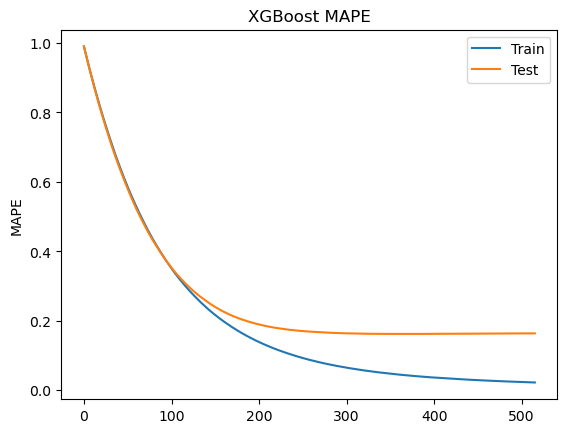

In [23]:
epochs = len(results['validation_0']['mape'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['mape'], label='Train')
ax.plot(x_axis, results['validation_1']['mape'], label='Test')
ax.legend()
plt.ylabel('MAPE')
plt.title('XGBoost MAPE')

In [25]:
train = read_sqlite_table('train', './data/train_test/train_data.db')

<BarContainer object of 35 artists>

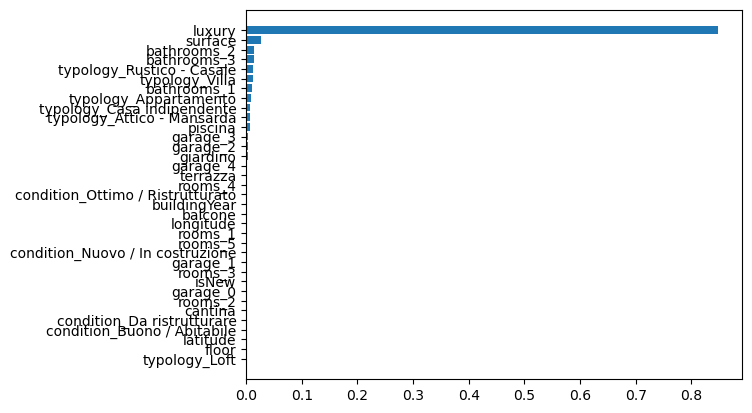

In [26]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], model.feature_importances_[sorted_idx])

In [27]:
x_axis

range(0, 516)

In [28]:
model = XGBRegressor(n_estimators=516, max_depth=20, eta=0.01, subsample=0.7, colsample_bytree=0.8, random_state=42,
                    eval_metric=["mape","rmse"], reg_alpha=0.15)

In [29]:
model.fit(train_data, train_target, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.01, eval_metric=['mape', 'rmse'],
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=516, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [30]:
train_pred = model.predict(train_data)
print(metrics.mean_absolute_percentage_error(train_target,train_pred))

0.02293123001038015


In [31]:
model.save_model('./model/xgb_model_1.json')